In [27]:
import pandas as pd
import numpy as np
import os
import random
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, MaxAbsScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.figure(figsize=(15, 12))

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

In [28]:
from itertools import islice

scaler = "maxabs"
wb = openpyxl.load_workbook("output/pca.xlsx")
data = wb[f"data_scaled_lof_{scaler}_scaler"].values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df = pd.DataFrame(data, index=idx, columns=cols)
df

,ent,adv_curr_acc_disc_doc_loans,asset_tot_asset,deriv_assets,exp_dep_cap_loans,implied_lending_rate,implied_liable_rate,implied_spread,liquidity_ratio,loan_avg_segment_asset,loans_cap_to_banks_assets,pers_cred_card_loans,roe,LOF,outlier
0,7,0.310240,0.266902,-0.057093,0.031616,-0.034546,-0.042531,-0.036810,-0.021088,-0.033604,-0.010301,0.259692,0.124927,-0.957948,1
1,11,-0.078018,1.000000,0.012246,0.054975,-0.070973,0.243410,0.022557,0.044475,-0.039401,-0.011038,-0.244917,0.268702,-1.698788,1
2,14,0.267182,0.292230,-0.001480,0.023247,-0.033556,0.014167,-0.001060,-0.049047,-0.035529,-0.011038,0.150590,-0.180512,-0.957423,1
3,15,-0.063403,0.109471,-0.057829,0.002277,-0.036280,0.062645,-0.072228,0.029487,-0.016075,-0.009355,-0.030889,0.260109,-0.989428,1
4,16,0.410325,0.102517,-0.026956,0.000000,-0.014254,0.414292,-0.216200,0.044058,-0.015504,-0.000161,0.049013,0.177487,-1.012664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,44096,-0.094896,-0.006550,0.000000,0.016820,-0.031943,0.644533,0.062847,-0.129827,0.041309,0.106302,-0.487652,-0.192954,-1.419117,1
66,44098,-0.308864,-0.002090,0.000000,0.056183,-0.030845,-0.711345,0.069734,0.095960,-0.040827,0.063972,-0.487651,0.352224,-1.521318,1
67,44099,-0.282527,-0.003405,0.000000,0.016405,0.008602,-1.000000,0.083102,0.102702,0.001215,0.184229,-0.487652,-0.142192,-1.572692,1
68,45056,-0.260447,-0.006455,0.000000,-0.082220,0.115962,-0.684551,-0.173330,-0.025314,-0.028683,-0.011038,0.778039,-0.452960,-1.518789,1


In [29]:
from itertools import islice

# scaler = "robust"
wb = openpyxl.load_workbook("output/pca.xlsx")
data = wb[f"{scaler}_scaler_pca_2d"].values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df_pca_2d = pd.DataFrame(data, index=idx, columns=cols)
df_pca_2d = df_pca_2d[df_pca_2d["outlier"]==1]
df_pca_2d

,ent,LOF,outlier,pca1,pca2
0,7,-0.957948,1,0.124666,-0.110176
1,11,-1.698788,1,-0.239619,-0.358867
2,14,-0.957423,1,0.014301,-0.017411
3,15,-0.989428,1,-0.004619,-0.209204
4,16,-1.012664,1,-0.238355,-0.468078
...,...,...,...,...,...
65,44096,-1.419117,1,-0.604234,-0.402659
66,44098,-1.521318,1,-0.010690,0.536604
67,44099,-1.572692,1,0.030525,0.994442
68,45056,-1.518789,1,0.965410,0.482341


In [30]:
from itertools import islice

# scaler = "robust"
wb = openpyxl.load_workbook("output/pca.xlsx")
data = wb[f"{scaler}_scaler_pca_3d"].values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df_pca_3d = pd.DataFrame(data, index=idx, columns=cols)
df_pca_3d = df_pca_3d[df_pca_3d["outlier"]==1]
df_pca_3d

,ent,LOF,outlier,pca1,pca2,pca3
0,7,-0.957948,1,0.124666,-0.110176,-0.320366
1,11,-1.698788,1,-0.239619,-0.358867,-0.065963
2,14,-0.957423,1,0.014301,-0.017411,-0.149242
3,15,-0.989428,1,-0.004619,-0.209204,-0.041606
4,16,-1.012664,1,-0.238355,-0.468078,-0.282950
...,...,...,...,...,...,...
65,44096,-1.419117,1,-0.604234,-0.402659,0.357096
66,44098,-1.521318,1,-0.010690,0.536604,-0.019591
67,44099,-1.572692,1,0.030525,0.994442,0.160664
68,45056,-1.518789,1,0.965410,0.482341,0.174578


In [31]:
data_arr = df[df.columns[1:-2]].to_numpy()
display(data_arr.shape)
display(data_arr[:,0:1].shape)
data_arr_2d = df_pca_2d[df_pca_2d.columns[-2:]].to_numpy()
display(data_arr_2d.shape)
display(data_arr_2d[:,0:1].shape)

(64, 12)

(64, 1)

(64, 2)

(64, 1)

DETERMINING THE NUMBER OF CLUSTERS IN A DATA SET

ELBOW METHOD

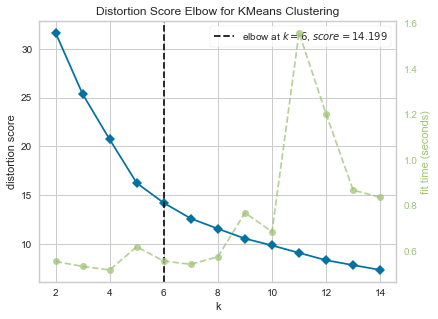

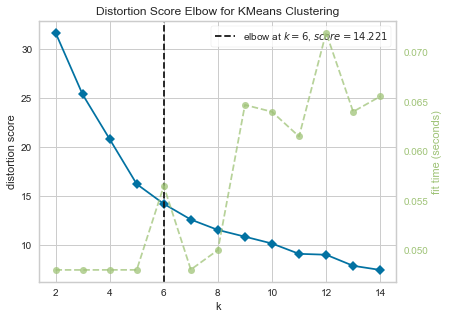

'visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="calinski_harabasz")\nvisualizer.fit(data_arr)        # Fit the data to the visualizer\nvisualizer.show()        # Finalize and render the figure\n\nvisualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="silhouette")\nvisualizer.fit(data_arr)        # Fit the data to the visualizer\nvisualizer.show()        # Finalize and render the figure'

In [55]:
'''distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=100, max_iter=10000) # , algorithm="elkan")
    kmeanModel.fit(data_arr)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()'''

visualizer1 = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15))
visualizer1.fit(data_arr)        # Fit the data to the visualizer
visualizer1.show()        # Finalize and render the figure

visualizer2 = KElbowVisualizer(KMeans(), k=(2,15))
visualizer2.fit(data_arr)        # Fit the data to the visualizer
visualizer2.show()        # Finalize and render the figure

'''visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="calinski_harabasz")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="silhouette")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure'''

In [56]:
display(visualizer1.k_scores_)
display(visualizer1.elbow_score_)
display(visualizer1.elbow_value_)
display("---------------------")
display(visualizer2.k_scores_)
display(visualizer2.elbow_score_)
display(visualizer2.elbow_value_)

[31.645088128090222,
 25.35681889139048,
 20.70439351989134,
 16.23459866788972,
 14.199182602656093,
 12.596084741148779,
 11.549135887716172,
 10.541238366844865,
 9.836504356423513,
 9.077099832907944,
 8.320227735242076,
 7.8203401776828585,
 7.32430320935329]

14.199182602656093

6

'---------------------'

[31.645088128090222,
 25.362470235462,
 20.812275476888704,
 16.23459866788972,
 14.221298550603173,
 12.621736766047924,
 11.56756910443285,
 10.878905753377405,
 10.183196306022078,
 9.13265000493852,
 9.042010635864411,
 7.914362282860412,
 7.492419119030489]

14.221298550603173

6

For n_clusters = 4 The average silhouette_score is : 0.2947692797414261
For n_clusters = 5 The average silhouette_score is : 0.34338059747634686
For n_clusters = 6 The average silhouette_score is : 0.2608442539194875


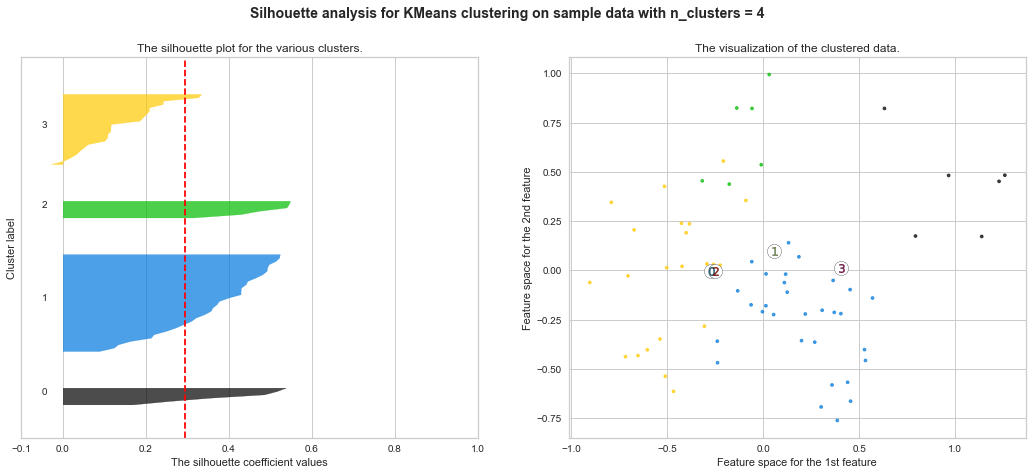

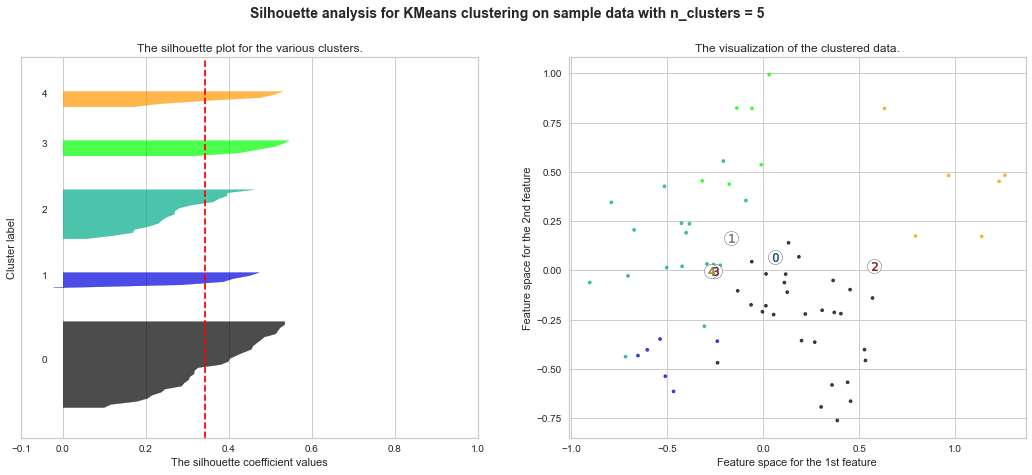

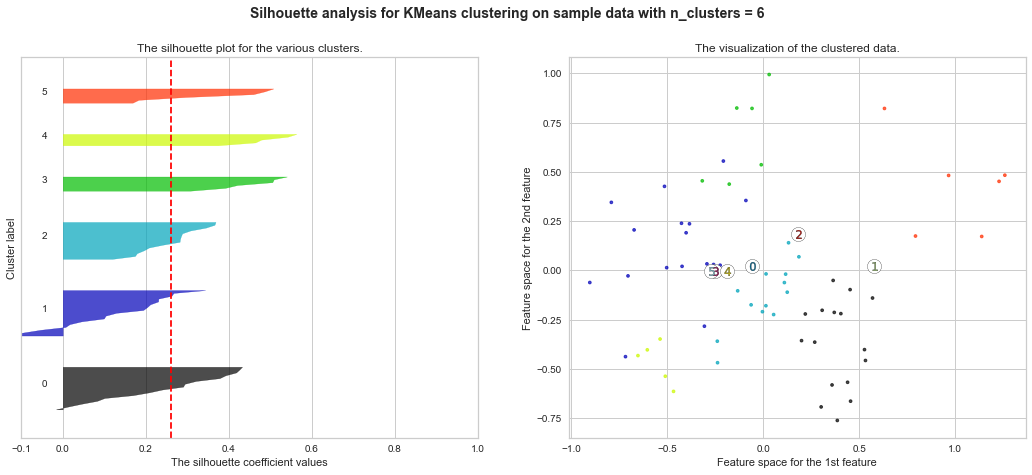

In [51]:
range_n_clusters = list(range(4,7))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_arr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_arr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_arr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_arr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_arr_2d[:, 0], data_arr_2d[:, 1], marker=".", s=30, lw=1, alpha=0.7, c=colors, edgecolor=colors
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=75, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

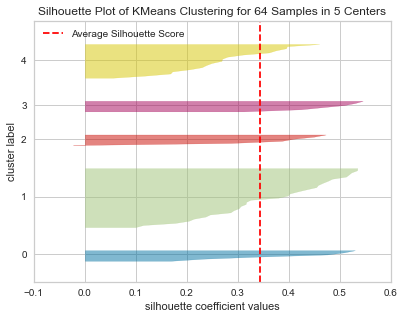

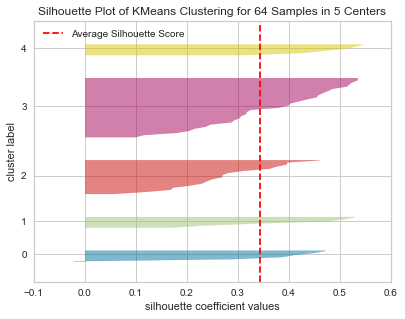

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 64 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
model = KMeans(n_clusters=5, n_init=100, max_iter=10000, algorithm="elkan")
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

model = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

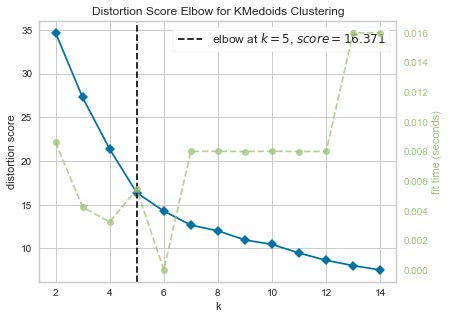

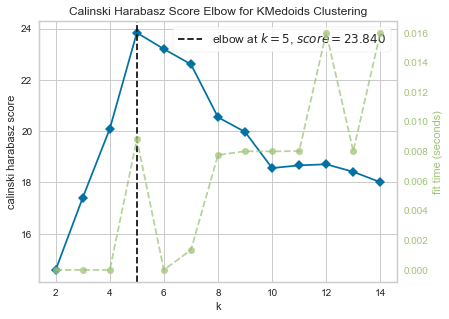

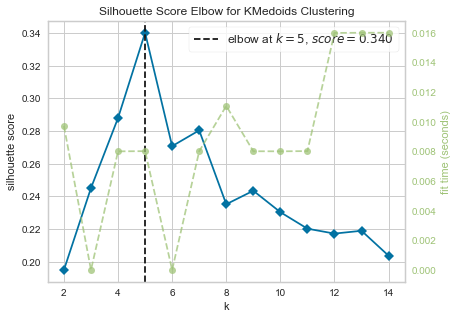

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='silhouette score'>

In [8]:
'''distortions = []
K = range(1,30)
for k in K:
    kmedoidsModel = KMedoids(metric="cosine", n_clusters=k, init="heuristic", max_iter=10000) #, method="pam")
    kmedoidsModel.fit(data_arr)
    distortions.append(kmedoidsModel.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
'''
visualizer = KElbowVisualizer(KMedoids(metric="euclidean", init="heuristic", max_iter=10000, method="pam"), k=(2,15))
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

visualizer = KElbowVisualizer(KMedoids(metric="euclidean", init="heuristic", max_iter=10000, method="pam"), k=(2,15), metric="calinski_harabasz")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

visualizer = KElbowVisualizer(KMedoids(metric="euclidean", init="heuristic", max_iter=10000, method="pam"), k=(2,15), metric="silhouette")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

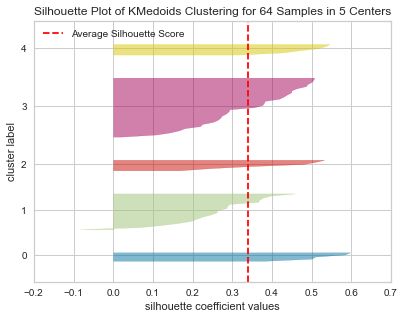

<AxesSubplot:title={'center':'Silhouette Plot of KMedoids Clustering for 64 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
model = KMedoids(metric="euclidean", n_clusters=5, 
         init="heuristic", max_iter=10000, method="pam")
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

X-MEANS METHOD

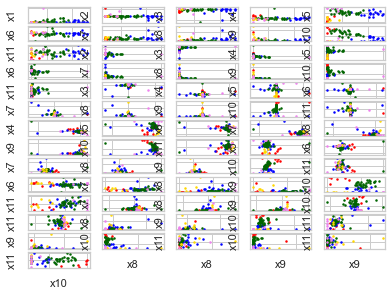

In [10]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FAMOUS_SAMPLES
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.xmeans import xmeans

# load 4D data sample 'Iris'
sample_4d = list(data_arr) # read_sample(FAMOUS_SAMPLES.SAMPLE_IRIS)
# display(sample_4d)
# initialize 3 initial centers using K-Means++ algorithm
centers = kmeans_plusplus_initializer(sample_4d, 5).initialize()
# performs cluster analysis using X-Means
xmeans_instance = xmeans(sample_4d, centers)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()
# display(clusters)
# visualize obtained clusters in multi-dimensional space
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, sample_4d)
visualizer.show(max_row_size=5) # max_row_size=3)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(data_arr, y_k_med)
print(silhouette_avg)

In [ ]:
sample_silhouette_values = silhouette_samples(data_pca, y_k_med)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_k_med == i]
    print(np.mean(ith_cluster_silhouette_values))